# K Nearest Neighbors

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

## Get the Data 

In [2]:
#https://www.kaggle.com/c/titanic/data

url = 'https://drive.google.com/uc?id=1zyYJMa75UXLjmODPRnl4_UrLJ0JKmEOC'
titanic_data = pd.read_csv(url)

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Preprocessing

In [5]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic_data = titanic_data.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1)

In [7]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
# fill missing age with mean
age_mean = titanic_data['Age'].mean()
titanic_data['Age'] = titanic_data['Age'].fillna(age_mean)

In [9]:
set(titanic_data['Embarked'])

{'C', 'Q', 'S', nan}

In [10]:
titanic_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [11]:
titanic_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [12]:
# fill missing 'Embarked'
titanic_data['Embarked'] = titanic_data['Embarked'].fillna('S')

In [13]:
# encode 'Sex' with digits
titanic_data['Sex'] = LabelEncoder().fit_transform(titanic_data['Sex'])

In [14]:
# encode 'Embarked' with digits
titanic_data['Embarked'] = LabelEncoder().fit_transform(titanic_data['Embarked'])

In [15]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [16]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


## Split Data to Test and Train Sets

In [17]:
X = titanic_data.drop(['Survived'], axis = 1)
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Standardize the Variables

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [20]:
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

In [21]:
scaled_X_train

array([[-0.37709883, -1.32251077,  1.39717548, ...,  2.04907344,
         0.65082295,  0.59356219],
       [-0.37709883, -1.32251077, -0.14382395, ..., -0.46634085,
        -0.1557235 , -1.92952007],
       [ 0.82691178,  0.75613751, -0.76022372, ..., -0.46634085,
        -0.4733415 ,  0.59356219],
       ...,
       [-0.37709883, -1.32251077,  0.62667576, ..., -0.46634085,
        -0.37211402,  0.59356219],
       [ 0.82691178,  0.75613751, -0.99137364, ..., -0.46634085,
        -0.48907899,  0.59356219],
       [-1.58110944, -1.32251077,  0.39552585, ..., -0.46634085,
         9.45062249, -1.92952007]], shape=(712, 7))

## KNN model

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)

In [23]:
knn.fit(scaled_X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [24]:
pred = knn.predict(scaled_X_test)

In [25]:
### compare real and predicted

In [26]:
y_test

63     0
174    0
477    0
852    0
85     1
      ..
356    1
632    1
639    0
569    1
653    1
Name: Survived, Length: 179, dtype: int64

In [27]:
pred

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1])

In [28]:
list(zip(pred, y_test))
pred2 = np.array(pred, dtype=np.int64)
y_test2 = np.array(y_test, dtype=np.int64)
diff = np.abs(pred2 - y_test2)
diff.size // 170
count_errors = np.sum(diff == 1)
# count_errors
count_errors / diff.size

np.float64(0.16201117318435754)

## Evaluation

In [29]:
cm = confusion_matrix(y_test,pred)
cm

# [[TN  FP]
#  [FN  TP]]
# 118 passengers correctly predicted as not survived (0).
# 9 passengers predicted as survived (1) but actually didn’t survive.
# 20 passengers predicted as not survived (0) but actually survived.
# 32 passengers correctly predicted as survived (1).

array([[109,  12],
       [ 17,  41]])

In [30]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       121
           1       0.77      0.71      0.74        58

    accuracy                           0.84       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.84      0.84      0.84       179



In [31]:
accuracy_score(y_test,pred)

0.8379888268156425

## Choosing a K Value

In [32]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

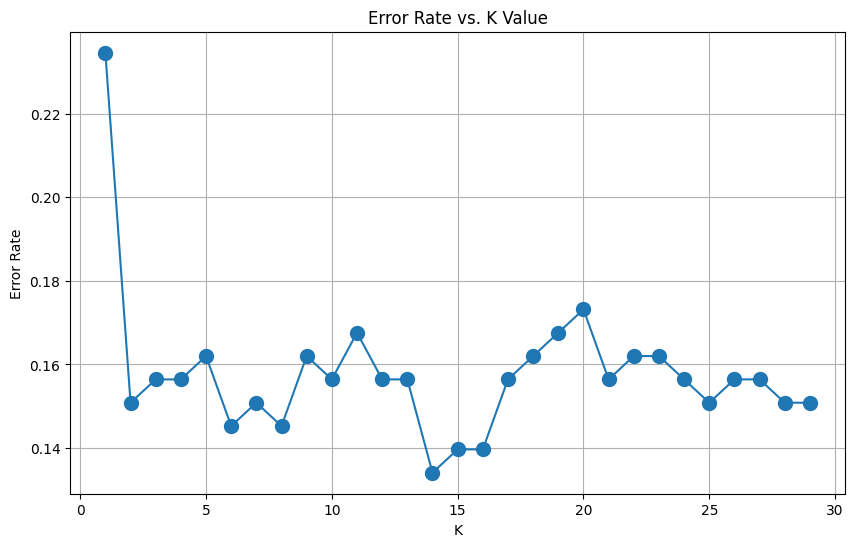

In [33]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [34]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))

[[110  11]
 [ 17  41]]

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       121
           1       0.79      0.71      0.75        58

    accuracy                           0.84       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.84      0.84      0.84       179

